## One-Sample t-test 
- z-test와 t-test의 가장 큰 차이점
  + z-test: 모수의 표준편차를 안다
  + t-test : 모수의 표준편차를 모른다. 
- 이것이 의미하는 것은 샘플의 표준편차를 여러번 구해서 모수의 표준편차를 추정(estimate)하는 것이다. 

### 샘플 표준편차 구하기

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


- 표준편차($σ$)는 9.5라고 말할 수 없다. 
- But, 샘플의 표준편차($\hat{\sigma }$)는 9.52라고 말할 수 있다. 

In [2]:
import statistics
statistics.stdev(df['grades'])

9.520614752375915

### 가설
- 귀무가설 : 모집단의 평균은 100이다. 
- 대립가설 : 모집단의 평균은 100이 아니다
- 이러한 가설 속에서 위 평균이 의미하는 것은 무엇인가? 여전히 기본 전제 조건은 모수의 표준편차를 알지 못한다는 것이다. 
  + 아래 그림을 보면, 모수의 표준편차를 모를 때, 모수의 평균과 샘플의 평균이 같은지, 다른지를 판단하는 것이다. 

Text(-1.2, 23.6, '$\\sigma = ??$')

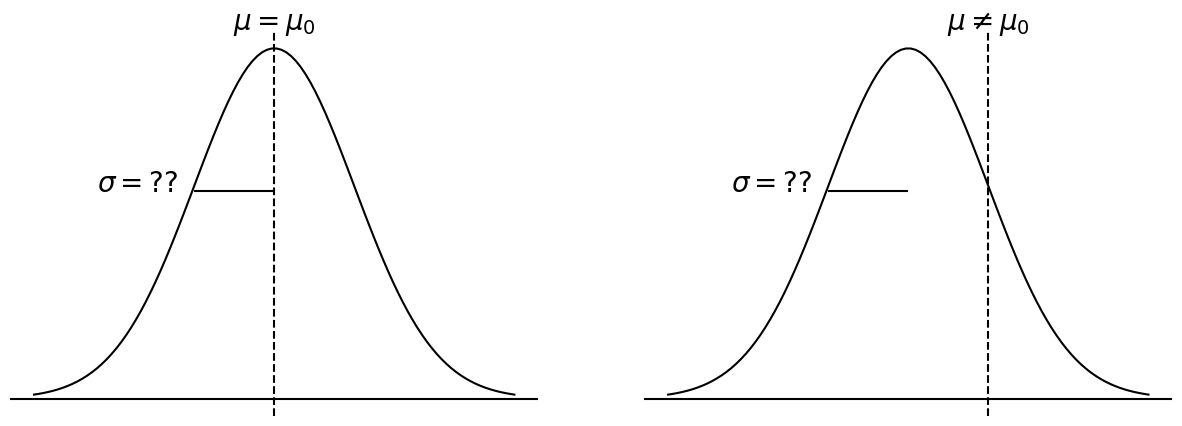

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=x,y=y, color='black', ax=axes[0])
sns.lineplot(x=x,y=y, color='black', ax=axes[1])

axes[0].set_frame_on(False)
axes[1].set_frame_on(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)


axes[0].axhline(y=0, color='black')
axes[0].axvline(x=mu, color='black', linestyle='--')

axes[1].axhline(y=0, color='black')
axes[1].axvline(x=mu + sigma, color='black', linestyle='--')

axes[0].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')
axes[1].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')


axes[0].text(mu,42, r'$\mu = \mu_0$', size=20, ha="center")
axes[1].text(mu + sigma, 42, r'$\mu \neq \mu_0$', size=20, ha="center")

axes[0].text(mu-sigma - 0.2, 23.6, r'$\sigma = ??$', size=20, ha="right")
axes[1].text(mu-sigma - 0.2, 23.6, r'$\sigma = ??$', size=20, ha="right")

### 추정
- 전체 모수에서 일부 샘플의 평균을 구했는데, 전체 모수를 추정할 수 있는 건 어떻게 가능할까? 
- 만약 모수가 1000명이라면, 샘플의 수를 늘리면 좀 더 정확해질 수 있다. 
- 아래 그림을 보면 좀 더 명확하게 설명할 수 있다. 
  + 여기에서 df는 전체 샘플(N)에서 -1을 취한 자유도(Degrees of Freedom)를 의미한다. 
  +  df가 작으면 분포가 이상적인 지점에 다다르지 않지만, df가 크면 분포가 이상적인 분포에 가깝다는 것을 알 수 있다. 
- 즉, 모수 대비 샘플이 크면 클수록 모수를 추정하는 정확도는 올라간다고 볼 수 있다. 

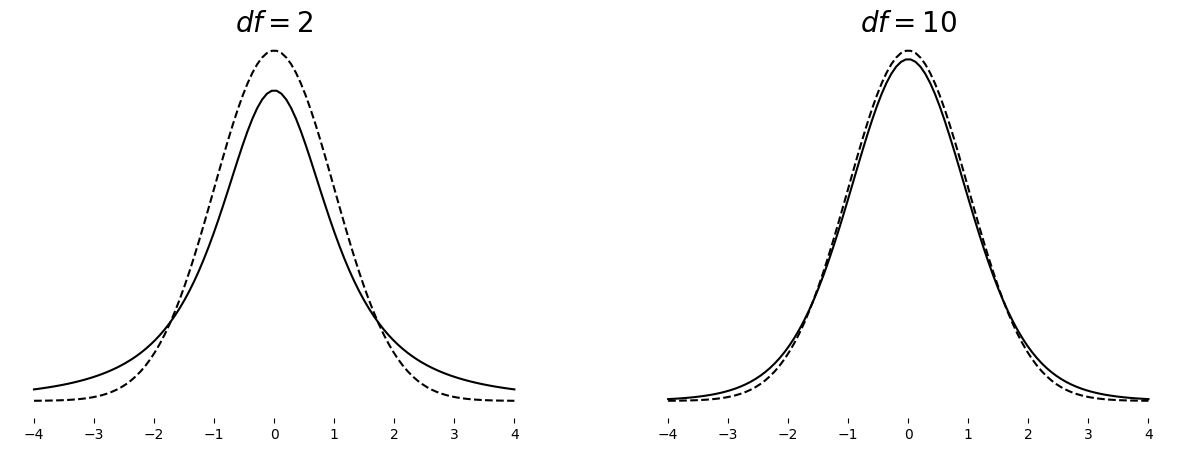

In [4]:
mu = 0
variance = 1    
sigma = np.sqrt(variance)


x = np.linspace(-4, 4, 100)
y_norm = stats.norm.pdf(x, mu, sigma)


fig, axes = plt.subplots(1, 2, figsize=(15, 5))


# t-distribution with 2 degrees of freedom
y_t = stats.t.pdf(x, 2)
sns.lineplot(x = x, y = y_norm, color = 'black', linestyle='--', ax = axes[0])
sns.lineplot(x = x, y = y_t, color = 'black', ax = axes[0])

# t-distribution with 10 degrees of freedom
y_t = stats.t.pdf(x, 10)
sns.lineplot(x = x, y = y_norm, color = 'black', linestyle='--', ax = axes[1])
sns.lineplot(x = x, y = y_t, color = 'black', ax = axes[1])

axes[0].text(0, 0.42, r'$df = 2$', size=20, ha="center")
axes[1].text(0, 0.42, r'$df = 10$', size=20, ha="center")


#sns.despine()
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[0].set_frame_on(False)
axes[1].set_frame_on(False)

plt.show()

## 테스트
- 전제조건
  + 전국 대학생의 평균 점수는 67.5이다. 
  + 우리 대학생 20명의 평균은 00이다. 
- 귀무가설 : 전국 대학생의 평균 점수와 우리 대학생의 평균점수는 통계적으로 유의하게 같다. 
- 대립가설 : 전국 대학생의 평균 점수와 우리 대학생의 평균점수는 통계적으로 유의하게 다르다. 

### t 통계량, p-value 값 구하기

In [5]:
from scipy.stats import ttest_1samp
t, p = ttest_1samp(a = df['grades'], popmean = 67.5)
t, p

(2.25471286700693, 0.03614521878144544)

### 표본의 평균, 자유도 구하기

In [6]:
N = len(df['grades'])
degfree = N-1
sample_mean = statistics.mean(df['grades'])
print('Sample mean:', sample_mean)
print('Degrees of freedom:', degfree)

Sample mean: 72.3
Degrees of freedom: 19


### 신뢰구간 구하기

In [7]:
from scipy import stats

confidence_level = 0.95
degrees_freedom = len(df['grades'])-1
sample_mean = statistics.mean(df['grades'])
sample_standard_error = stats.sem(df['grades'])

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(67.84421513791415, 76.75578486208585)

### 결과 보고
- 평균 72.3을 기록한 우리 학생들의 평균 점수는 전체 대학생의 평균점수 67.5 ($t(19) = 2.25, p<.05$, 신뢰도 95% 신뢰구간 [67.8, 76.8])보다 약간 높다. 
- $t(19) = 2.25, p<.05, CI_{95} = [67.8, 76.8]$

### pingouin 라이브러리
- 자세한 설명은 여기 참조 한다. 
  + https://pingouin-stats.org/build/html/index.html

In [8]:
!pip install --upgrade pingouin

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 198.6/198.6 kB 207.9 kB/s eta 0:00:00
     -------------------------------------- 979.5/979.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for littleutils: started
  Running setup.py install for littleutils: finished with status 'done'


  DEPRECATION: littleutils is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from pingouin import ttest
ttest(df['grades'], 67.5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.254713,19,two-sided,0.036145,"[67.84, 76.76]",0.504169,1.795,0.571446


## one sample t-test의 가정
- z-test와 기본적으로 동일하다. 
- 정규성(Normality)
- 독립성(Independence) : 샘플의 관측값은 서로 독립적으로 생성됨